# Background
The Transportation Security Administration (TSA) is an agency of the United States Department of Homeland Security. The primary task of the TSA is to ensure the security of the traveling public. Individuals who have been injured or had their items damaged during the screening process at an airport can file a claim to the TSA. The claims data are recorded since 2002 and publicly available [here](https://www.dhs.gov/tsa-claims-data).

## Problem Statement
The Operations Management Team is a component of the TSA that establishes standards and directives, emergency preparedness, and determines the effectiveness of security operation programs. This management team intends to leverage the claims data in the process of **understanding the outcome and frequency of TSA claims in different conditions from 2002-2015**. The understanding and information derived from the claims data can help the TSA in improving its security operations and further support its mission of protecting the nation's transportation systems to ensure freedom of movement for people and commerce.

Based on the analysis objectives of the operations management team, an exploratory data analysis (EDA) is conducted to address the following questions:
* How is the trend of TSA claims from 2002-2015? 
* In which US airports are TSA claims more frequently received?
* What are the top items being claimed? 
* Where are claim incidents most likely to occur and what are the items frequently claimed at these locations? 
* What are the odds of getting claims approved?

# Data
The dataset used for this analysis was obtained from Kaggle and can be accessed from [here](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database).

In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('tsa_claims.csv')
display(df.head(),df.tail())
display (df.shape, df.columns)

C:\Users\User\AppData\Local\Temp\ipykernel_7152\852544554.py:2: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


(204267, 13)

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

The dataset contains 204267 observations and 13 fields. The description of the fields are as follows:
1.  `Claim Number` : Unique ID for each claim
2.  `Date Received`: Date the claim was filed
3.  `Incident Date`: Date the incident occured
4.  `Airport Code` : Code of airport where the incident occured
5.  `Airport Name` : Name of airport where the incident occured
6.  `Airline Name` : Name of airline boarded by the claimant
7.  `Claim Type`   : Type of the claim filed
8.  `Claim Site`   : Where the claim occured
9.  `Item`         : Item claimed
10. `Claim Amount` : Dollar amount of the claim
11. `Status`       : Claim status after being received and processed
12. `Close Amount` : Dollar amount of the settlement
13. `Disposition`  : Final settlement of the claim

## Data Understanding and Cleaning

Data understanding is done to get a general overview of the data. The data understanding process also helps in identifying anomalies in the data to be analysed. Anomalies such as missing values, outliers, duplicated data will be handled through the data cleaning process. The handling of anomalies will be justified based on domain knowledge and statistical approaches.

The process of understanding the TSA claims data is presented below.

### General Data Info

In [3]:
# checking data info
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.info()

The dataset has 204267 rows and 13 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


### Descriptive Statistics

In [4]:
# descriptive statistics of data
df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


### Missing Values

In [5]:
# function to calcualate missing values in dataframe
def null_check(df):
    # checking missing values
    df_null = df.isnull().sum().reset_index().rename(columns={'index': 'columns', 0:'sum_null'})
    
    # calculate percentage of missing values
    df_null['percentage'] = df_null['sum_null'].apply(lambda x: round((x/len(df))*100, 2))

    # sorting df_null by percentage of missing values 
    return df_null.sort_values(by=['percentage'], ascending=False)

In [6]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,72908,35.69
11,Close Amount,68952,33.76
5,Airline Name,34374,16.83
3,Airport Code,8524,4.17
4,Airport Name,8524,4.17
6,Claim Type,7913,3.87
9,Claim Amount,4043,1.98
8,Item,3966,1.94
2,Incident Date,2183,1.07
7,Claim Site,740,0.36


### Detect Duplicates

In [7]:
# checking duplicated data
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN


### Unique data in columns

In [8]:
pd.set_option('display.max_colwidth', None)

# checking unique data in columns
list_item = []
for i in df.columns :
    list_item.append([i, df[i].nunique(), df[i].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=list_item)
df_unique.style

Based on the data understanding process, the following were observed:
- The tsa_claim dataset comprises 204267 rows and 13 columns.
- All columns contain data with object datatype. For further analysis, the `Date Received` and `Incident Date` columns will be parsed as datatime object. The `Claim Amount` and `Close Amount` columns will be converted to float datatype.
- All columns contain missing values except the `Claim Number` column. As seen in the unique data in columns, missing values are denoted as NaN in the dataframe.  
- The `Disposition`, `Close Amount` and `Airline Name` columns have the highest percentage of missing values. The percentage of missing values in these columns corresponds to 35.69%, 33.76% and 16.83% respectively.
- Data in rows 16841 and 16842 are duplicated. One of these rows will be deleted.
- The `Airport Name` column contains 485 unique values while the `Airport Code` column contain 465 unique values. The number of unique values in both column should be the same. The anomalies and missing values in these columns will be further handled.
- Anomalies can be observed in the `Airline Name` column as some uniques values such as 'AirTran Airlines' and 'Air Tran Airlines(do not use)' appear to be similar. These anomalies will be further handled.   

## Data Cleaning

### `Claim Number`

Based on the data understanding process, it was observed that data in some rows such as 16841 and 16842 have similar Claim Number. Duplicated data will be cleaned based on the Claim Number.

In [9]:
# shape of dataframe before dropping duplicates
df.shape

(204267, 13)

In [10]:
# dropping duppicates based on Claim Number column
df.drop_duplicates(subset=['Claim Number'], keep='first', inplace=True)

# shape of dataframe after dropping duplicates
df.shape

(204258, 13)

It can be observed that 9 rows were dropped based on duplicated Claim Number.

### `Date Received` and `Incident Date`

First, these columns are parsed as datetime object for more flexible analysis. It was observed that some data in `Incident Date` column are inputted incorrectly and outside the range of Pandas timestamp. These unparsable data are converted to NaT (not a time) by using the errors parameter inside the to_datetime function. 

In [11]:
# parsing columns to datetime object
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

In [12]:
# checking the year range in Date Received column
df['Date Received'].dt.year.value_counts().sort_index()

1994.0        1
1996.0        1
2000.0        4
2002.0     1054
2003.0    22473
2004.0    29786
2005.0    24548
2006.0    19093
2007.0    18672
2008.0    16440
2009.0    12803
2010.0    10925
2011.0    10905
2012.0    10069
2013.0     9698
2014.0     8848
2015.0     8666
2020.0        1
2025.0        5
2040.0        1
2044.0        1
2055.0        1
Name: Date Received, dtype: int64

In [13]:
# checking the year range in Incident Date column
df['Incident Date'].dt.year.value_counts().sort_index()

1996.0        1
2000.0       14
2001.0       15
2002.0     2156
2003.0    24507
2004.0    28960
2005.0    22965
2006.0    18806
2007.0    18270
2008.0    15902
2009.0    11179
2010.0    12215
2011.0    10995
2012.0     9996
2013.0     9529
2014.0     8680
2015.0     7721
Name: Incident Date, dtype: int64

We can observe that some data in the `Date Received` and `Incident Date` columns are outside the 2002-2015 range. Next, the data outside this range will be dropped.

In [14]:
# selecting data from 2002-2015
df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

Because these two columns are related, we would like to make a simple comparison between both columns.

In [15]:
# checking whether the incident date of claims happened after the claim was filed (anomaly)   
df[df['Incident Date'] > df['Date Received']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185745,2013111809508,2013-11-16,2013-11-16 11:22:00,EWR,Newark International Airport,UAL,Passenger Property Loss,Checkpoint,Cosmetics & Grooming,$0.00,Deny,NaN,NaN
185827,2013112509637,2013-11-20,2013-11-20 06:00:00,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,-,-,-,NaN,NaN
186051,2013120509848,2013-12-02,2013-12-02 07:00:00,DFW,Dallas-Fort Worth International Airport,Jet Blue,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
186298,2013121810132,2013-12-11,2013-12-11 12:20:00,-,-,-,Property Damage,Checkpoint,Baggage/Cases/Purses,-,-,NaN,NaN


The result of the comparison between `Incident Date` and `Date Recieved` columns shows an anomaly in 1710 observations. The claim incident in these observations occured after the claims were received (not normal). It is expected that the claims were received after the incident occured. These 1710 observations will be dropped. 

In [16]:
index = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=index, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [17]:
# resetting data index
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [18]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,71002,35.50
11,Close Amount,67336,33.67
5,Airline Name,32027,16.01
3,Airport Code,6939,3.47
4,Airport Name,6939,3.47
6,Claim Type,6327,3.16
8,Item,3683,1.84
9,Claim Amount,2501,1.25
7,Claim Site,515,0.26
0,Claim Number,0,0.00


So far, we have handled the anomalies in the `Claim Number`, `Date Received` and `Incident Date` columns.

Next, we will continue handling the anomalies in other columns.

### `Airport Code` and `Airport Name`
There is a relationship between both columns. Airports with the same name should have same airport code. Let's check whether this condition is true. 

In [19]:
# number of unique airport names based on airport code
ac_an = df.groupby("Airport Code")['Airport Name'].nunique().sort_values(ascending=False)

# airport code having more than 1 airport name
print(df[df['Airport Code'].isin(ac_an[ac_an>1].index)].groupby('Airport Code')['Airport Name'].unique())

Airport Code
BOS          [Boston (Logan) International Airport, Boston (Logan) International Airport ]
BUR                                                                  [Bob Hope, Bob Hope ]
BZN                            [Gallatin Field, Bozeman Yellowstone International Airport]
DEN                          [Denver International Airport, Denver International Airport ]
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ                                    [Dubois Jefferson County, Dubois Jefferson County ]
EAR                                [Kearney Municipal Airport, Kearney Municipal Airport ]
HIB                                [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]
INL                                            [Falls International, Falls International ]
JHM                                                    [Kapalua Airport, Kapalua Airport ]
LAX                [Los Angeles International Airport, Los Angeles Internatio

It can be observed that some airport codes have multiple distinct airport names separated with whitespace. We can fix this by removing the duplicates from excess whitespace. 

In [20]:
# removing duplicates from airport names
df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()

In [21]:
# number of unique airport names based on airport code
ac_an2 = df.groupby("Airport Code")['Airport Name'].nunique().sort_values(ascending=False)

# airport code having more than 1 airport name
print(df[df['Airport Code'].isin(ac_an2[ac_an2>1].index)].groupby('Airport Code')['Airport Name'].unique())

Airport Code
BZN    [Gallatin Field, Bozeman Yellowstone International Airport]
PNS          [Pensacola Regional, Pensacola International Airport]
Name: Airport Name, dtype: object


There are 2 airport codes with multiple airport names. We can fix this by using a specific airport name for each airport code.    

In [22]:
# replacing multiple airport names with a specific airport name
df['Airport Name'] = df['Airport Name'].replace(to_replace='Gallatin Field',value='Bozeman Yellowstone International Airport')
df['Airport Name'] = df['Airport Name'].replace(to_replace='Pensacola Regional',value='Pensacola International Airport')

Next, rows with NaN values in the `Airport Code` and `Airport Name` will be dropped.

In [23]:
# dropping rows with missing values
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [24]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,67824,35.13
11,Close Amount,64370,33.34
5,Airline Name,27210,14.09
6,Claim Type,5382,2.79
8,Item,3487,1.81
9,Claim Amount,2004,1.04
7,Claim Site,341,0.18
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00


The anomalies in the `Airport Code` and `Airport Name` columns have been handled

### Airline Name
Let's assess the unique airline names and scan through the output.

In [25]:
# unique airline names
df['Airline Name'].unique()

array(['Southwest Airlines', nan, 'American Airlines', 'Delta Air Lines',
       'America West', 'Continental Airlines', 'USAir', 'UAL',
       'Virgin Atlantic', 'Jet Blue', 'Northwest Airlines',
       'Alaska Airlines', 'AirTran Airlines', 'Spirit Airlines',
       'Frontier Airlines', 'American West', 'Air Canada',
       'British Airways', 'America Trans Air', 'Aero Mexico',
       'Hawaiian Airlines', 'Lufthansa', 'Lan Airlines', 'Aloha Airlines',
       'Midwest Express Airlines', 'Qantus Airways',
       'Frontier Aviation Inc', 'Korean Airlines', 'Air Jamaica',
       'KLM Royal Dutch Airlines', 'Alitalia', 'Air France', 'Aer Lingus',
       'Air Tran Airlines(do not use)', 'Japan Airlines', 'Comair Inc',
       'ATA Aerocondor', 'Singapore Airlines', 'Mexicana', 'Swiss Air',
       'Aero Flot', 'Sun Country Airlines Inc',
       'Air 2000 Ltd Great Britain', 'Horizon Air',
       'Skywest Airlines Inc USA', 'Allegiant Air', 'TWA',
       'American Eagle', 'Delta (Song)', 'Sou

We can observe that are some airline names with extra whitespace. The whitespace in the airline names will be removed. Also there are some missing values in this column denoted as NaN. Some rows are filled with '-'. The rows with NaN and '-' will be replaced with the word 'Unspecified' with an assumption that the claimant did not specify the boarded airline. Some misspelled airline names were also detected, which be replaced with the right spelling. 

In [26]:
# removing all whitespace from airline name
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')

In [27]:
# replacing NaN values and '-' with the word 'Unspecified'
df['Airline Name'].fillna(value='Unspecified', inplace=True)
df['Airline Name'].replace(to_replace= '-', value='Unspecified', inplace=True)

In [28]:
# replacing misspelt airline names with right spellings
df['Airline Name'].replace(to_replace="AmericanWest", value="AmericaWest", inplace=True)
df['Airline Name'].replace(to_replace="AirTranAirlines(donotuse)", value="AirTranAirlines", inplace=True)
df['Airline Name'].replace(to_replace="AeroflotRussianInternational", value="AeroFlot", inplace=True)
df['Airline Name'].replace(to_replace="Delta(Song)", value="DeltaAirLines", inplace=True)

In [29]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,67824,35.13
11,Close Amount,64370,33.34
6,Claim Type,5382,2.79
8,Item,3487,1.81
9,Claim Amount,2004,1.04
7,Claim Site,341,0.18
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00


The anomalies in the `Airline Name` column have been handled

### `Claim Type` and `Claim Site`
There are a few missing values in both columns. We will handle these missing values by assigning them to a new category called 'Other'. 

Also, let's assess the categories in these columns and handle the found anomalies.

In [30]:
# checking categories in claim type column
df['Claim Type'].value_counts()

Passenger Property Loss    113774
Property Damage             70916
Personal Injury              1420
Employee Loss (MPCECA)        469
Passenger Theft               446
Motor Vehicle                 342
-                             274
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

We can observe that 274 rows in the `Claim Type` column are filled with '-'. We will fix this also by assigning the '-' to a new category called 'Others'.

In [31]:
# replacing NaN values and '-' to 'Others' category
df['Claim Type'].fillna(value='Other', inplace=True)
df['Claim Type'].replace(to_replace= '-', value='Other', inplace=True)

In [32]:
# checking categories in claim type column
df['Claim Type'].value_counts()

Passenger Property Loss    113774
Property Damage             70916
Other                        5656
Personal Injury              1420
Employee Loss (MPCECA)        469
Passenger Theft               446
Motor Vehicle                 342
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

Next, categories in the Claim Site column is assessed.

In [33]:
# checking categories in claim site column
df['Claim Site'].value_counts()

Checked Baggage    152462
Checkpoint          38226
Other                1334
Motor Vehicle         435
-                     265
Bus Station            15
Name: Claim Site, dtype: int64

We can observe that 265 rows in the `Claim Site` column are filled with '-'. We will fix this by assigning the '-' to the category called 'Other'.

In [34]:
# replacing NaN values and '-' to 'Other' category
df['Claim Site'].fillna(value='Other', inplace=True)
df['Claim Site'].replace(to_replace= '-', value='Other', inplace=True)

In [35]:
# checking categories in claim site column
df['Claim Site'].value_counts()

Checked Baggage    152462
Checkpoint          38226
Other                1940
Motor Vehicle         435
Bus Station            15
Name: Claim Site, dtype: int64

In [36]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,67824,35.13
11,Close Amount,64370,33.34
8,Item,3487,1.81
9,Claim Amount,2004,1.04
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00


The anomalies in the `Claim Type` and `Claim Site` columns have been handled

### `Item`

This column contain 1.81% missing values. These misssing values will be assigned to a new category called 'Other' because the percentage is considerably low and will not significantly affect the consistency of our analysis. Some rows filled with '-' were also detected. These rows will also be assigned to the 'Other' category.

In [37]:
# replacing NaN values and '-' to 'Other' category
df['Item'].fillna(value='Other', inplace=True)
df['Item'].replace(to_replace= '-', value='Other', inplace=True)

Let's assess the unique values in this column and handle the found anomalies.

In [38]:
# checking categories in item column
df['Item'].unique()

array(['Clothing - Shoes; belts; accessories; etc.', 'Computer - Laptop',
       'Jewelry - Fine', ...,
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories',
       'Clothing; Clothing; Hunting & Fishing Items; Sporting Equipment & Supplies',
       'Cameras; Clothing; Clothing; Clothing; Clothing; Jewelry & Watches; Jewelry & Watches'],
      dtype=object)

It can be observed that for each unique item, there is an item category name followed by the specific item(s) separated by a dash or semi-colon. In order to simplify the values in the item column, the first word which represents item category will be retrieved.

In [39]:
# remove leading and ending whitespaces
df['Item'] = df['Item'].str.strip()

In [40]:
# selecting the first word (item category) which is separated by dash/semi-colon/ampersand
df['Item'] = df['Item'].str.split(' - ',expand=True)[0]
df['Item'] = df['Item'].str.split('; ',expand=True)[0]
df['Item'] = df['Item'].str.split(' &',expand=True)[0]

In [41]:
# checking categories in item column
df['Item'].unique()

array(['Clothing', 'Computer', 'Jewelry', 'Eyeglasses',
       'Luggage (all types including footlockers)', 'Other', 'Currency',
       'Cell Phones', 'Cameras', 'Cosmetics', 'Baby', 'Photographic Film',
       'PDA', 'DVD/CD Players', 'Locks', 'Musical Instruments',
       'Stereo Items', 'Fish/Game', 'Medicines', 'Automobile Parts',
       'Watches', 'Tools', 'Toys', 'Alcoholic beverages',
       'Dental Equipment and Instruments', 'Books', 'Dishes',
       'Hearing Aids', 'Video Recordings (blank', 'Clocks', 'Audio',
       'Medical Equipment', 'Candles', 'Camping Equipment', 'Bags',
       'Sporting Equipment', 'Lighting Supplies (globe domes',
       'Paintings and Pictures (including frames', 'Lighters',
       'Game Equipment (poker chips', 'House Keeping Items (mops', 'GPS',
       'Binoculars', 'Brushes', 'Briefcases', 'Barber Supplies',
       'Kitchen Utensils -Pots', 'Knick Knacks (bric-a-bracks)',
       'Handbags', 'Bedding', 'Silverplate', 'MP3 Players-(iPods',
       'F

In [42]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
12,Disposition,67824,35.13
11,Close Amount,64370,33.34
9,Claim Amount,2004,1.04
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00


The anomalies in the `Item` column have been handled to meet the need of the current analysis. In-depth cleaning can be performed on this column to extract more insights.

### `Claim Amount` and `Close Amount`

Let's assess the unique values in these columns and handle the found anomalies.

In [43]:
# checking unique values in claim amount column
df['Claim Amount'].unique()

array(['$75.00 ', '$2;270.09 ', '$4;457.29 ', ..., '$1;520.85 ',
       '$643.32 ', '$3;668.84 '], dtype=object)

In [44]:
# checking unique values in claim amount column
df['Close Amount'].unique()

array(['$75.00 ', nan, '$17.00 ', ..., '$689.42 ', '$514.73 ', '$826.72 '],
      dtype=object)

Some anomalies can be observed in the `Claim Amount` and `Close Amount` columns. Some figures contain ending whitespaces which will be stripped. Some figures also contain semi-colon and dollar symbols which will be removed. Also, the rows fill with '-' will be replaced with zero as a valid number. The datatype of these columns which is currently set as object will be converted to Float datatype.

In [45]:
# remove ending whitespaces
df['Claim Amount'] = df['Claim Amount'].str.strip()
df['Close Amount'] = df['Close Amount'].str.strip()

In [46]:
# removing $, ; symbols in figures and replacing '-' with 0
df['Claim Amount'] = df['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')

C:\Users\User\AppData\Local\Temp\ipykernel_7152\2467108197.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Claim Amount'] = df['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
C:\Users\User\AppData\Local\Temp\ipykernel_7152\2467108197.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')


In [47]:
# coverting object datatype to float
df['Claim Amount'] = df['Claim Amount'].astype(float)
df['Close Amount'] = df['Close Amount'].astype(float)

In [48]:
# checking unique values in both columns
print(df['Claim Amount'].unique())
print(df['Close Amount'].unique())

[  75.   2270.09 4457.29 ... 1520.85  643.32 3668.84]
[ 75.      nan  17.   ... 689.42 514.73 826.72]


It can be seen that the anomalies in the figure have been handled. Also, the datatype as been converted to float. However, there are some missing values in the Claim Amount and Close Amount columns. These missing values will be handled in the following sections as it is observed that some values and anomalies can be fixed based on the relationships between the `Status`, `Disposition`, `Claim Amount` and `Close Amount` columns. Further handling of anomalies in these 4 columns will be explored based on their relationships.

### `Status`, `Disposition`, `Claim Amount` and `Close Amount`

In [49]:
# checking unique values in stasus column
df['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Deny', '-', 'Settle',
       'Approve in Full'], dtype=object)

The `Status` column contain some rows with '-'. These rows will be dropped because most of the values in its corresponding `Close Amount` and `Disposition` columns are missing, making it almost impossible for any inference to be made.

In [50]:
# observations with '-' in status column 
df[df['Status']== '-'].head(7)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
141162,2010010567177,2010-01-04,2010-01-01 00:00:00,DEN,Denver International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Clothing,0.0,-,NaN,NaN
141168,2010010767268,2010-01-05,2010-01-02 00:00:00,IAD,Washington Dulles International,UAL,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.0,-,NaN,NaN
141172,2010010767271,2010-01-06,2010-01-01 00:00:00,CLE,Cleveland Hopkins International,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,0.0,-,NaN,NaN
141174,2010010867306,2010-01-06,2010-01-03 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Food,0.0,-,NaN,NaN
141176,2010010867334,2010-01-06,2010-01-04 12:40:00,BIL,Billings; MT,UAL,Passenger Property Loss,Checkpoint,Currency,0.0,-,NaN,NaN
141189,2010011367490,2010-01-08,2010-01-01 16:30:00,JFK,John F. Kennedy International,JetBlue,Passenger Property Loss,Checkpoint,Other,0.0,-,NaN,NaN
141198,2010011167431,2010-01-11,2010-01-07 00:00:00,GEG,Spokane International,USAir,Passenger Property Loss,Checked Baggage,Books,0.0,-,NaN,NaN


In [51]:
# dropping observations with '-' in status column 
df = df.drop(index=df.loc[df['Status']=='-'].index)
display(df.head(), df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Canceled,NaN,NaN


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
199939,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Unspecified,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approve in Full,NaN,NaN
199952,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Other,Other,656.56,Approve in Full,NaN,NaN
199953,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,1520.85,Approve in Full,NaN,NaN
199954,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,643.32,Approve in Full,NaN,NaN
199956,2015120827419,2015-12-08,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,3668.84,Settle,NaN,NaN


In [52]:
# checking unique values in stasus column
df['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Deny', 'Settle',
       'Approve in Full'], dtype=object)

We can also observe that the unique values in the `Status` column contain some similar values which can be simplified. The unique values will be simplified into 4 categories namely; 'Approved','Denied','Settled', dan 'Pending'.

In [53]:
# re-classifying values in status colum
status_approved = ['Approved', 'Approve in Full', 'Settle']
status_settled = ['Settled']
status_denied = ['Canceled','Denied','Closed as a contractor claim',\
                'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',\
                'Deny']
status_pending = ['In litigation','In review','Claim has been assigned for further investigation','Pending response from claimant']

In [54]:
# Looping untuk menginpute semua  Status klasifikasi baru
update_status = []

for i in df['Status']:
    if i in status_approved:
        update_status.append('Approved')
    elif i in status_denied:
        update_status.append('Denied')
    elif i in status_settled:
        update_status.append('Settled')
    else:
        update_status.append('Pending')

df['Status'] = update_status

In [55]:
# checking unique values in stasus column
df['Status'].unique()

array(['Approved', 'Denied', 'Settled', 'Pending'], dtype=object)

Now let's observe claims with the `Status` Denied and its corresponding `Close Amount`.

In [56]:
# claims with the status 'Denied'
df[df['Status']=='Denied']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,NaN,Deny
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Denied,NaN,NaN
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny
6,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Unspecified,Other,Other,Luggage (all types including footlockers),50.00,Denied,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199911,2015072023983,2015-07-13,2015-07-06,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.00,Denied,NaN,NaN
199915,2015042722126,2015-04-27,2015-04-22,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer,0.00,Denied,NaN,NaN
199919,2015102126149,2015-10-01,2015-09-30,YUM,Yuma International Airport,AmericanAirlines,Passenger Property Loss,Checkpoint,Currency,0.00,Denied,NaN,NaN
199931,2015050822378,2015-05-05,2015-04-09,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,0.00,Denied,NaN,NaN


There are some claims with the `Status` Denied and missing values (NaN) in its corresponding `Close Amount` column. Claims denied won't receive any amount of cash, so we will fill these missing values in the `Close Amount` column with 0. 

In [57]:
# filling missing values of close amount column (when status Denied)  
df.loc[df['Status']=='Denied','Close Amount'] = df.loc[df['Status']=='Denied','Close Amount'].fillna(0)

Now let's observe claims with the `Status` Pending and its corresponding `Close Amount`.

In [58]:
# claims with the status 'Pending'
df[df['Status']=='Pending']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
40,21003,2002-09-24,2002-08-31 00:00:00,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,Other,250000.00,Pending,NaN,NaN
41,21021,2002-09-24,2002-08-31 00:00:00,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,Eyeglasses,50000.00,Pending,NaN,NaN
6502,0604019L,2003-06-04,2003-04-24 00:00:00,LNK,Lincoln Municipal,UAL,Passenger Property Loss,Checked Baggage,Clothing,80.00,Pending,NaN,Approve in Full
7653,0628504M,2003-06-19,2003-03-02 00:00:00,LAX,Los Angeles International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Jewelry,2738.97,Pending,NaN,NaN
8079,0625041M,2003-06-25,2003-06-06 00:00:00,STL,Lambert St. Louis International,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,61550.00,Pending,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131664,2009041457478,2009-03-26,2008-03-24 00:00:00,LAX,Los Angeles International Airport,ContinentalAirlines,Passenger Property Loss,Checked Baggage,Cameras,500.00,Pending,NaN,Deny
132319,2009042157788,2009-04-13,2008-03-06 00:00:00,ORD,Chicago O'Hare International Airport,AmericanAirlines,Personal Injury,Checkpoint,Other,95000.00,Pending,NaN,NaN
138216,2009100164200,2009-09-28,2009-07-29 08:10:00,DEN,Denver International Airport,DeltaAirLines,Personal Injury,Checkpoint,Other,10500.00,Pending,NaN,NaN
138474,2009030455885,2009-10-05,2009-01-06 00:00:00,LAX,Los Angeles International Airport,AeroMexico,Personal Injury,Checkpoint,Other,1359.00,Pending,559.0,Settle


There are some claims with the `Status` Pending and missing values (NaN) in its corresponding `Close Amount` column. Claims pending won't receive any amount of cash, so we will fill these missing values in the `Close Amount` column with 0. 

In [59]:
# filling missing values of close amount column (when status Pending)  
df.loc[df['Status']=='Pending','Close Amount'] = df.loc[df['Status']=='Pending','Close Amount'].fillna(0)

Now let's observe claims with the `Status` Approved and its corresponding `Close Amount`.

In [60]:
# claims with the status 'Approved'
df[df['Status']=='Approved']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
13,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full
15,14907,2002-09-09,2002-06-28,SDF,Louisville International,Unspecified,Property Damage,Checkpoint,Luggage (all types including footlockers),275.00,Approved,275.0,Approve in Full
16,17892,2002-09-09,2002-08-23,RDU,Raleigh-Durham International,USAir,Property Damage,Checkpoint,Luggage (all types including footlockers),30.00,Approved,30.0,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199939,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Unspecified,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,NaN,NaN
199952,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Other,Other,656.56,Approved,NaN,NaN
199953,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,NaN,NaN
199954,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,NaN,NaN


There are some claims with the `Status` Approved and missing values (NaN) in its corresponding `Close Amount` column. Claims approved received the same amount of cash claimed, so we will fill these missing values in the `Close Amount` column with the amount claimed. 

In [61]:
# filling missing values of close amount column (when status Approved) 
df.loc[df['Status']=='Approved','Close Amount'] = df.loc[df['Status']=='Approved','Close Amount'].fillna(df['Claim Amount'])

In [62]:
# checking unique values in disposition column
df['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

To fill some missing values in the `Disposition` column, comparisons will be made with the `Status` column. In a condition whereby the `Status` is 'Approved', the missing value in its corresponding `Disposition` column will be filled with 'Approved in Full'. Furthermore, where the `Status` is 'Denied', the missing value in its corresponding `Disposition` column will be filled with 'Deny'. Where the `Status` is 'Pending', the missing value in its corresponding `Disposition` column will be filled with 'Pending'. 

In [63]:
# filling missing values of disposition column (when status Approved)
df.loc[df['Status']=='Approved','Disposition'] = df.loc[df['Status']=='Approved','Disposition'].fillna('Approve in Full')

In [64]:
# filling missing values of disposition column (when status Denied)
df.loc[df['Status']=='Denied','Disposition'] = df.loc[df['Status']=='Denied','Disposition'].fillna('Deny')

In [65]:
# filling missing values of disposition column (when status Pending)
df.loc[df['Status']=='Pending','Disposition'] = df.loc[df['Status']=='Pending','Disposition'].fillna('Pending')

In our dataset, claims with the `Disposition` 'Approve in Full' should have the same `Claim Amount` and `Close Amount`. The following operation will be performed to further fill missing values in `Claim Amount` column.

In [66]:
# fill missing values in claim amount column with its corresponding close amount (for Disposition=='Approve in Full')
df.loc[df['Disposition']=='Approve in Full','Claim Amount'] = df.loc[df['Disposition']=='Approve in Full','Claim Amount'].fillna(df['Close Amount'])

In [67]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
9,Claim Amount,1955,1.08
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00


Let's investigate missing values in the `Close Amount` column

In [68]:
df[df['Close Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
6148,0602063L,2003-06-02,2003-05-07,BHM,Birmingham International Airport,SouthwestAirlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,Approved,NaN,Approve in Full
13415,0903058M,2003-09-03,2003-06-12,LAX,Los Angeles International Airport,Unspecified,Passenger Property Loss,Checked Baggage,Other,NaN,Approved,NaN,Approve in Full
22494,0107224M,2004-01-07,2003-12-19,LIT,Little Rock National,SouthwestAirlines,Property Damage,Checkpoint,Jewelry,NaN,Approved,NaN,Approve in Full
23977,0129162M,2004-01-29,2003-09-02,SDF,Louisville International,Unspecified,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,Approved,NaN,Approve in Full


These 4 observations will be dropped because there is no direct inference can be made to fill the missing values in `Claim Amount` and `Close Amount` columns.

In [69]:
# dropping observations
df.drop(index=[6148, 13415, 22494, 23977], inplace=True)

In [70]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
9,Claim Amount,1951,1.08
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00


Let's investigate missing values in the `Claim Amount` column

In [71]:
# check missing values in claim amount column
df[df['Claim Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
53,0616802L,2002-10-07,2002-08-07 00:00:00,CMH,Port Columbus International,Unspecified,Personal Injury,Checkpoint,Other,NaN,Denied,0.0,Deny
682,1218004L,2002-12-18,2002-11-23 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),NaN,Denied,0.0,Deny
848,0616534L,2002-12-30,2002-12-09 00:00:00,PHX,Phoenix Sky Harbor International,Unspecified,Personal Injury,Checkpoint,Other,NaN,Denied,0.0,Deny
1085,2004071259114,2003-01-09,2002-12-07 00:00:00,ORF,Norfolk International,USAir,Passenger Property Loss,Checked Baggage,Jewelry,NaN,Denied,0.0,Deny
1322,0616710L,2003-01-21,2002-12-02 00:00:00,HNL,Honolulu International Airport,Unspecified,Personal Injury,Checkpoint,Other,NaN,Denied,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140908,2009122966887,2009-12-22,2009-12-06 00:00:00,JFK,John F. Kennedy International,JetBlue,Passenger Property Loss,Checkpoint,Other,NaN,Denied,0.0,Deny
140961,2010010767263,2009-12-24,2009-12-06 00:00:00,LAS,McCarran International,USAir,Property Damage,Checked Baggage,Medicines,NaN,Denied,0.0,Deny
141030,2009123167002,2009-12-28,2009-12-12 00:00:00,PHL,Philadelphia International Airport,NorthwestAirlines,Passenger Property Loss,Checkpoint,Clothing,NaN,Denied,0.0,Deny
141031,2010010867314,2009-12-28,2009-12-28 00:00:00,SPI,Abraham Lincoln Capital Airport; Springfield,Unspecified,Motor Vehicle,Motor Vehicle,Automobile Parts,NaN,Denied,0.0,Deny


These missing `Claim Amount` values cannot be filled because it is not logical to make an inference based on `Close Amount` of Denied claims. Hence, these observations are dropped.

In [72]:
# dropping rows of missing values in claim amount column
df = df.dropna(subset=['Claim Amount'])

In [73]:
# checking missing values
null_check(df)

,columns,sum_null,percentage
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


At this stage, all missing values and other anomalies in the dataset have been handled.

Let's take a look at the cleaned dataset.

In [74]:
# displaying dataset
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Deny
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Denied,0.0,Deny


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
199939,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Unspecified,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,250.00,Approve in Full
199952,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Other,Other,656.56,Approved,656.56,Approve in Full
199953,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,1520.85,Approve in Full
199954,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,643.32,Approve in Full
199956,2015120827419,2015-12-08,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,3668.84,Approved,3668.84,Approve in Full


In [75]:
# resetting data index
df.reset_index(drop=True, inplace=True)
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Deny
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Denied,0.0,Deny


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
178452,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Unspecified,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,250.00,Approve in Full
178453,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Other,Other,656.56,Approved,656.56,Approve in Full
178454,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,1520.85,Approved,1520.85,Approve in Full
178455,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,643.32,Approved,643.32,Approve in Full
178456,2015120827419,2015-12-08,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,3668.84,Approved,3668.84,Approve in Full


### Cleaned Data

In [76]:
list_item = []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_info = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=list_item)
print(df.shape)
df_info

(178457, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,178457,"[2005051384675, 2011030480933]"
1,Date Received,datetime64[ns],0,3826,"[2005-04-25T00:00:00.000000000, 2008-01-10T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,23081,"[2010-10-14T11:00:00.000000000, 2010-09-26T18:00:00.000000000]"
3,Airport Code,object,0,455,"[DRO, GFK]"
4,Airport Name,object,0,455,"[Great Bend Municipal Airport, Kona International]"
5,Airline Name,object,0,225,"[SkywestAirlinesIncUSA, AirTahitiNui]"
6,Claim Type,object,0,10,"[Passenger Theft, Passenger Property Loss]"
7,Claim Site,object,0,5,"[Other, Checkpoint]"
8,Item,object,0,127,"[Mirrors (including frames), Bedding]"
9,Claim Amount,float64,0,35283,"[41.6, 42.36]"


Before the data cleaning process, the dataset contains 204267 rows and 13 columns. After the data cleaning process, the dataset contains 178457 rows and 13 columns. The data size reduced by 12.64%. All columns now have the appropriate datatype. 

In [77]:
# export data
#df.to_csv('tsa_claims_clean.csv')
#df.to_excel('tsa_claims_clean.xlsx')

## Data Analysis

To understand and gain insights regarding the **frequency of TSA claims in different conditions from 2002-2015**, the following questions are addressed:
* How is the trend of TSA claims from 2002-2015? 
* In which US airports are TSA claims more frequently received?
* What are the top items being claimed? 
* Where are claim incidents most likely to occur and what are the items frequently claimed at these locations? 

### Trend of TSA Claims from 2002-2015 (13 Years)

In [78]:
# new column for the year each claim occured
df['Year'] = df['Date Received'].dt.year
df.head(4)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,2002
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,0.0,Deny,2002
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full,2002


In [105]:
# df of total claims per year
yearlyClaims = df.groupby('Year', as_index=False)['Claim Number'].count().rename(
               columns={'Claim Number':'Claims'})
yearlyClaims
#yearlyClaims.to_excel('yearlyClaims.xlsx')

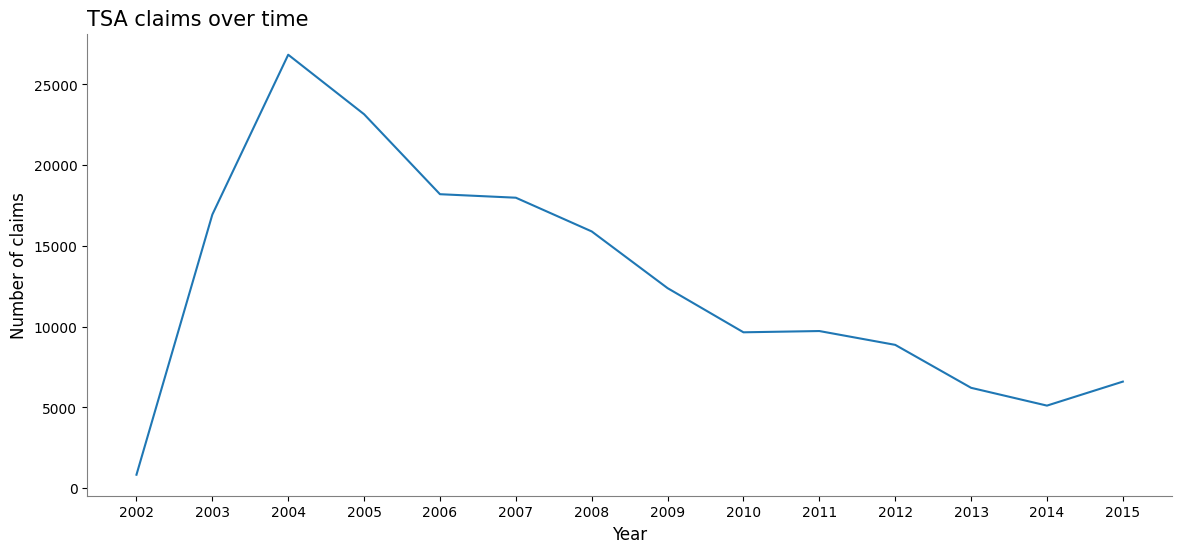

In [80]:
# creating lineplot of tsa claims over time
plt.figure(figsize=(14,6))
plt.plot(yearlyClaims['Year'], yearlyClaims['Claims'])
plt.title('TSA claims over time', size=15, loc='left')
plt.xlabel('Year', size=12)
plt.ylabel('Number of claims', size=12)
plt.xticks(yearlyClaims['Year'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

The least number of yearly TSA claims (834) was recorded in 2002. No published reason was found to be cause for this number of claims in 2002. However, this might be associated to the fact that the TSA began collecting claims data in 2002 and the recording system could be in its development stage. Between 2003-2015 the yearly reported claims ranged between 5000-27000 with the peak in 2004. Generally, it can be observed that since 2004, there is a downward trend in the yearly number of reported claims. This is a positive indicator of the TSA's performance in ensuring minimum injuries and damages during the screening process at US airports.

### US airports receiving higher number of TSA claims

After assessing the 13 years trend of the reported TSA claims, we wish to assess investigate 10 airports that experienced high frequency of TSA claims.

In [106]:
airportClaims = df[['Airport Code','Airport Name']].value_counts().to_frame().reset_index().rename(
               columns={0:'Claims Frequency'})
airportClaims['Percentage'] = round(airportClaims['Claims Frequency'] / sum(airportClaims['Claims Frequency'])*100, 2)

# df of top 10 airports with highest percentage of TSA claims
airportClaims_10 = airportClaims.head(10)
airportClaims_10
#airportClaims_10.to_excel('top10_airport.xlsx')

In [82]:
# total percentage of TSA claims in 10 airports
sum(airportClaims_10['Percentage'])

33.8

[Text(0, 0, '4.91'),
 Text(0, 0, '4.48'),
 Text(0, 0, '3.54'),
 Text(0, 0, '3.5'),
 Text(0, 0, '3.29'),
 Text(0, 0, '3.16'),
 Text(0, 0, '2.92'),
 Text(0, 0, '2.78'),
 Text(0, 0, '2.66'),
 Text(0, 0, '2.56')]

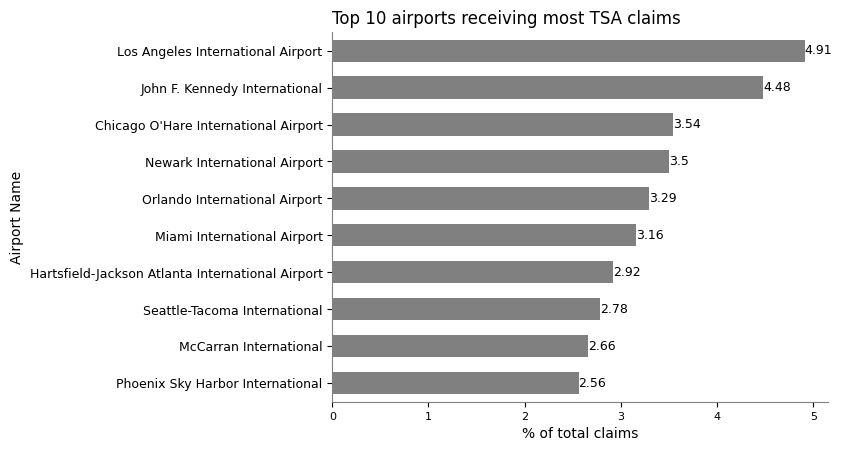

In [83]:
# creating bar plot of top 10 airports receiving most TSA claims
splot = sns.barplot(data=airportClaims_10, x='Percentage', y='Airport Name', width=0.6, color='grey')
plt.title('Top 10 airports receiving most TSA claims', size=12, loc='left')
plt.xlabel('% of total claims', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

It can be seen that 33.8% of the total claims were filed at 10 airports. Majority of these airports are listed on the top 20 [chart](https://www.stratosjets.com/blog/busiest-us-airports/) of the busiest airports in the US. A positive linear relationship between high passengers traffic and frequency of TSA claims is seen in this case. 

### Top items being claimed

Furthermore, we can investigate the items more frequently claimed to help the TSA formulate better safety and handling measures. 

In [107]:
itemsOnly = df[df['Item'] != 'Other']
itemsClaimed =  itemsOnly['Item'].value_counts().to_frame().reset_index().rename(
               columns={'index':'Item', 'Item':'Frequency'})

# df of top 10 items claimed
itemsClaimed_10 = itemsClaimed.head(10)
itemsClaimed_10
#itemsClaimed_10.to_excel('top10_items.xlsx')

[Text(0, 0, '20946'),
 Text(0, 0, '17099'),
 Text(0, 0, '14009'),
 Text(0, 0, '13155'),
 Text(0, 0, '12816'),
 Text(0, 0, '9631'),
 Text(0, 0, '6930'),
 Text(0, 0, '6297'),
 Text(0, 0, '3846'),
 Text(0, 0, '3368')]

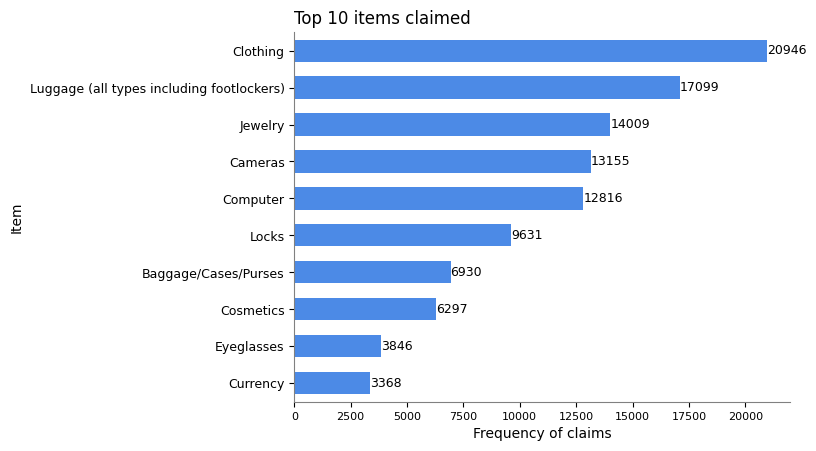

In [85]:
# creating bar plot of top 10 items claimed
splot = sns.barplot(data=itemsClaimed_10, x='Frequency', y='Item', width=0.6, color='#3385ff')
plt.title('Top 10 items claimed', size=12, loc='left')
plt.xlabel('Frequency of claims', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

The top 2 items being claimed are clothing and various types of luggage including footlockers. High-cost items such as jewelries, cameras and computers are also frequently claimed. We will further explore locations where these items are likely to get damaged or missing in order to improve safety and security measures at these sites. 

### Items frequently claimed at incident prone locations in airports

In order to address this case, let's investigate the locations where TSA claim incidents are most likely to occur.

In [110]:
# df of incident locations
incidentSites = itemsOnly['Claim Site'].value_counts().to_frame().reset_index().rename(
               columns={'index':'Location', 'Claim Site':'Frequency'})
incidentSites['Percentage'] = round(incidentSites['Frequency'] / sum(incidentSites['Frequency'])*100, 2)
incidentSites
#incidentSites.to_excel('4.incidentSites.xlsx')   

,Location,Frequency,Percentage
0,Checked Baggage,110517,79.03
1,Checkpoint,28274,20.22
2,Other,1009,0.72
3,Motor Vehicle,41,0.03
4,Bus Station,6,0.00


[Text(0, 0, '79.03'),
 Text(0, 0, '20.22'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0')]

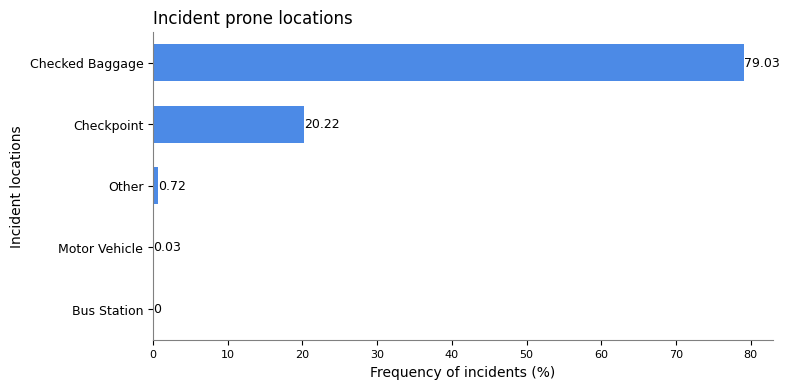

In [87]:
# creating bar plot of incident prone locations
plt.figure(figsize=(8,4))
splot = sns.barplot(data=incidentSites, x='Percentage', y='Location', width=0.6, color='#3385ff') 
plt.title('Incident prone locations', size=12, loc='left')
plt.xlabel('Frequency of incidents (%)')
plt.ylabel('Incident locations')
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

Around 99% of TSA claims incident occurred in checked baggage and during screening at checkpoints. Let's take a closer look at the data to see which items are being damaged in these 2 locations. 

In [114]:
checkpoint =  itemsOnly[itemsOnly['Claim Site'] == 'Checkpoint']
checkpoint_item =  checkpoint['Item'].value_counts().to_frame().reset_index().rename(
                       columns={'index':'Item', 'Item':'Frequency'})

# df of top 10 item claims that happended at checkpoints
checkpoint_item_10 = checkpoint_item.head(10)
checkpoint_item_10
#checkpoint_item_10.to_excel('5.top10_checkpoint.xlsx') 

,Item,Frequency
0,Computer,4932
1,Jewelry,4014
2,Clothing,3099
3,Luggage (all types including footlockers),1923
4,Eyeglasses,1894
5,Cameras,1793
6,Currency,1375
7,Personal Accessories,1177
8,Personal Electronics,1137
9,Cell Phones,999


[Text(0, 0, '4932'),
 Text(0, 0, '4014'),
 Text(0, 0, '3099'),
 Text(0, 0, '1923'),
 Text(0, 0, '1894'),
 Text(0, 0, '1793'),
 Text(0, 0, '1375'),
 Text(0, 0, '1177'),
 Text(0, 0, '1137'),
 Text(0, 0, '999')]

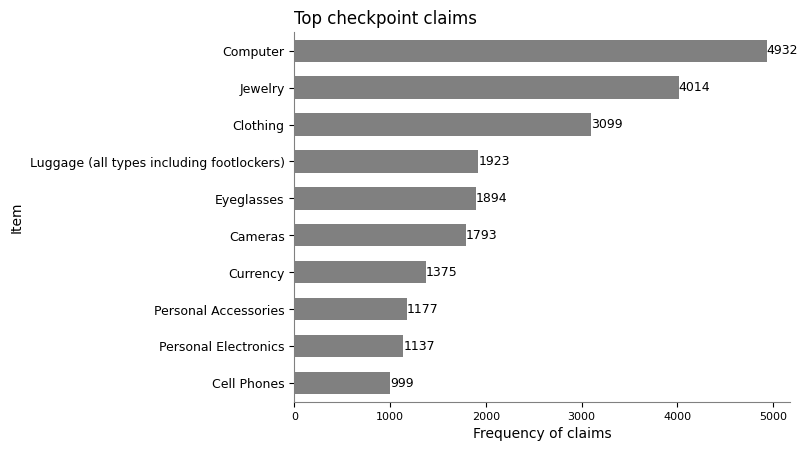

In [89]:
# creating bar plot of top 10 item claims that happended at checkpoints
splot = sns.barplot(data=checkpoint_item_10, x='Frequency', y='Item', width=0.6, color='grey')
plt.title('Top checkpoint claims', size=12, loc='left')
plt.xlabel('Frequency of claims', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

TSA claim incidents at airport checkpoints are more likely to be associated with items such as computers, jewelries and clothings. Next, let's investigate the claim items that are associated with checked baggage.

In [116]:
checkedBaggage =  itemsOnly[itemsOnly['Claim Site'] == 'Checked Baggage']
checkedBaggage_item =  checkedBaggage['Item'].value_counts().to_frame().reset_index().rename(
                       columns={'index':'Item', 'Item':'Frequency'})

# df of top 10 item claims that happended with checked baggage
checkedBaggage_item_10 = checkedBaggage_item.head(10)
checkedBaggage_item_10
#checkedBaggage_item_10.to_excel('6.top10_checkedBaggage.xlsx') 

,Item,Frequency
0,Clothing,17699
1,Luggage (all types including footlockers),14934
2,Cameras,11288
3,Jewelry,9881
4,Locks,9435
5,Computer,7790
6,Baggage/Cases/Purses,6146
7,Cosmetics,5473
8,Travel Accessories,2955
9,Currency,1939


[Text(0, 0, '17699'),
 Text(0, 0, '14934'),
 Text(0, 0, '11288'),
 Text(0, 0, '9881'),
 Text(0, 0, '9435'),
 Text(0, 0, '7790'),
 Text(0, 0, '6146'),
 Text(0, 0, '5473'),
 Text(0, 0, '2955'),
 Text(0, 0, '1939')]

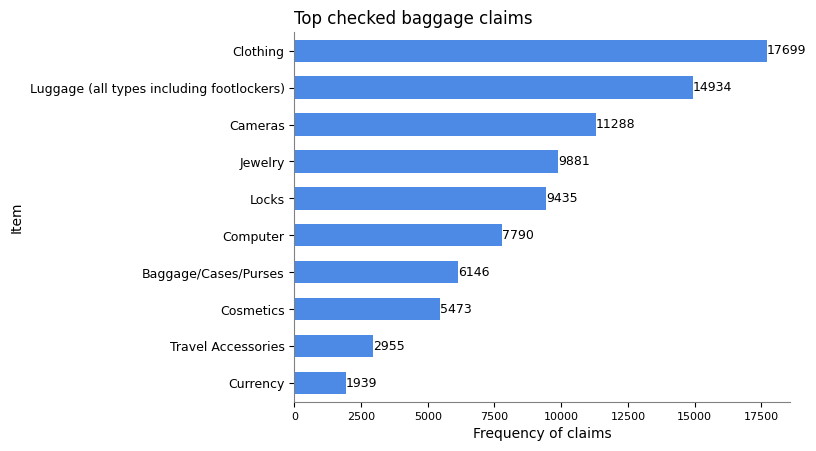

In [91]:
# creating bar plot of top 10 item claims that happended with checked baggages
splot = sns.barplot(data=checkedBaggage_item_10, x='Frequency', y='Item', width=0.6, color='#3385ff')
plt.title('Top checked baggage claims', size=12, loc='left')
plt.xlabel('Frequency of claims', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

TSA claim incidents that happened with checked baggage are more likely to be associated with items such as clothings, luggages and cameras. In the case of cameras, it is advisable that passengaer check-in their cameras as cabin luggage. However, airlines should ensure the safety of checked baggage such as luggages and clothings. Next we'll explore which airlines are having more issues with checked baggages.

In [118]:
checkedBaggage_airline =  checkedBaggage['Airline Name'].value_counts().to_frame().reset_index().rename(
                       columns={'index':'Airline Name', 'Airline Name':'Frequency'})

# df of top 10 airlines having issues with checked baggages
checkedBaggage_airline_10 = checkedBaggage_airline.head(10)
checkedBaggage_airline_10.iloc[3,0] = 'UnitedAirlines'
checkedBaggage_airline_10
#checkedBaggage_airline_10.to_excel('7.top10_checkedBaggageAirline.xlsx') 

,Airline Name,Frequency
0,DeltaAirLines,15001
1,AmericanAirlines,14117
2,Unspecified,13216
3,UnitedAirlines,11834
4,SouthwestAirlines,11351
5,USAir,7907
6,ContinentalAirlines,7299
7,NorthwestAirlines,5653
8,JetBlue,4250
9,AlaskaAirlines,3852


[Text(0, 0, '15001'),
 Text(0, 0, '14117'),
 Text(0, 0, '13216'),
 Text(0, 0, '11834'),
 Text(0, 0, '11351'),
 Text(0, 0, '7907'),
 Text(0, 0, '7299'),
 Text(0, 0, '5653'),
 Text(0, 0, '4250'),
 Text(0, 0, '3852')]

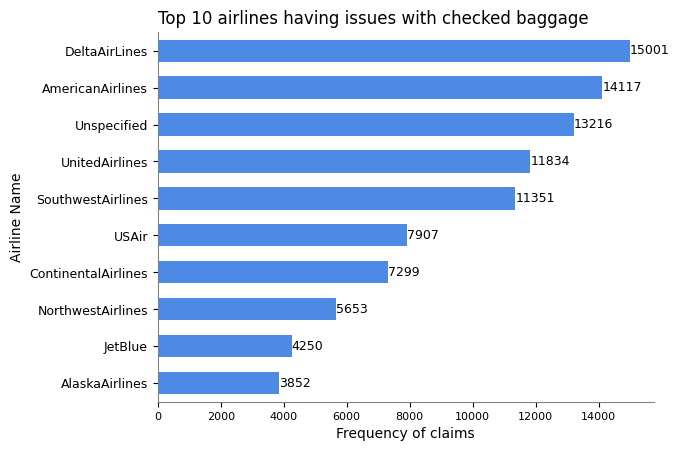

In [93]:
# creating bar plot of top 10 airlines having issues with checked baggages
splot = sns.barplot(data=checkedBaggage_airline_10, x='Frequency', y='Airline Name', width=0.6, color='#3385ff')
plt.title('Top 10 airlines having issues with checked baggage', size=12, loc='left')
plt.xlabel('Frequency of claims', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.bar_label(splot.containers[0], size=9, label_type='edge')

Airlines that received more TSA claims regarding issues with checked baggage include Delta Airlines, American Airlines, United Airlines and South-west Airlines. 

### Odds of getting claims approved

From the list of top items being claimed, we wish to explore the likely **outcome of TSA claims**. The odds of getting these claims fully approved or denied is analysed. 

In [94]:
# list of top 10 claimed items
topItemsclaimed = ['Clothing', 'Luggage (all types including footlockers)', 'Jewelry', 'Cameras', 'Computer', 
                    'Locks', 'Baggage/Cases/Purses', 'Cosmetics', 'Eyeglasses', 'Currency']

# df of top 10 claimed items approved in full or denied
topitemsClaimed = itemsOnly[itemsOnly['Item'].isin(topItemsclaimed)]
approveDeny_topitemsClaimed = topitemsClaimed.loc[(topitemsClaimed['Disposition']=='Approve in Full') | (topitemsClaimed['Disposition']=='Deny')]
approveDeny_topitemsClaimed

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full,2002
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,0.00,Deny,2002
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Unspecified,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.00,Deny,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.00,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Denied,0.00,Deny,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178431,2015032721574,2015-03-27,2015-03-12,YKM,Yakima Air Terminal-Mcallister,AmericanAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Approved,189.99,Approve in Full,2015
178433,2015072023983,2015-07-13,2015-07-06,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.00,Denied,0.00,Deny,2015
178434,2015080424556,2015-07-30,2015-07-20,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,3.00,Approved,3.00,Approve in Full,2015
178437,2015042722126,2015-04-27,2015-04-22,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer,0.00,Denied,0.00,Deny,2015


In [120]:
# percentage of top 10 TSA claims aprroved and denied 
df_approveDeny = pd.crosstab(approveDeny_topitemsClaimed['Item'], approveDeny_topitemsClaimed['Disposition'])
df_approveDeny['% Approved'] = round(df_approveDeny['Approve in Full'] / (df_approveDeny['Approve in Full'] + df_approveDeny['Deny'])*100, 2)
df_approveDeny['% Denied']   = round(df_approveDeny['Deny'] / (df_approveDeny['Approve in Full'] + df_approveDeny['Deny'])*100, 2)
df_approveDeny = df_approveDeny.drop(['Approve in Full', 'Deny'], axis=1)
df_approveDeny.sort_values(by=['% Approved'], ascending=False)
#df_approveDeny.to_excel('8.persen_approveDeny.xlsx') 

Disposition,% Approved,% Denied
Item,,
Eyeglasses,47.37,52.63
Locks,44.94,55.06
Clothing,38.47,61.53
Luggage (all types including footlockers),36.56,63.44
Baggage/Cases/Purses,36.55,63.45
Cosmetics,26.95,73.05
Currency,24.21,75.79
Computer,24.01,75.99
Jewelry,19.97,80.03


Text(0.5, 0, '% chance for approval/deny')

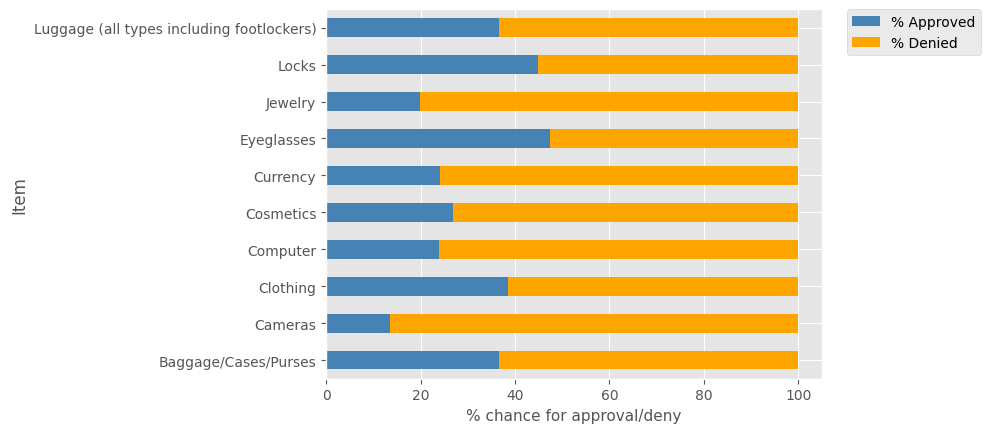

In [96]:
# creating stacked horizontal bar plot of top 10 TSA claims aprroved and denied 
plt.style.use('ggplot')
ax = df_approveDeny.plot(kind='barh', stacked=True, color=['steelblue', 'orange'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
ax.set_xlabel('% chance for approval/deny', fontsize=11)

We can see that the chance of approving claim items such as cameras, jewelry, computer, currency, cosmetics is very low. Other items such as eyeglasses, locks, clothing, luggage (all types including footlockers) and baggage/cases/purses have a better chance of being approved by the TSA. 

Finally, we can perform a correlation analysis to explore the relationship between `Claim Amount` and `Close Amount`.

<AxesSubplot: xlabel='Claim Amount', ylabel='Close Amount'>

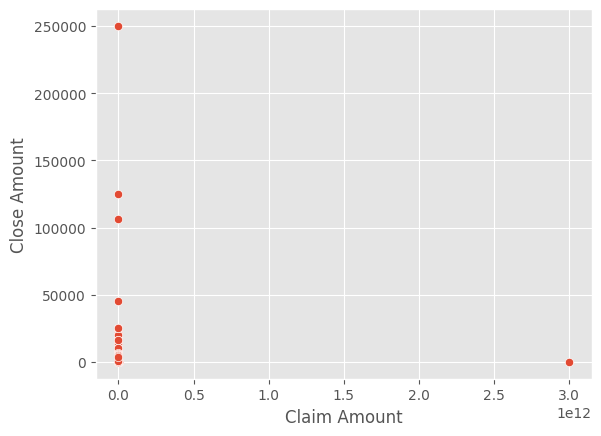

In [97]:
# creating scatterplot to view relationship between claim amount and close amount
sns.scatterplot(data=df, x='Claim Amount', y='Close Amount')

The scatter plot cannot clearly show the relationship between both vaariables because of some outliers in the data. To omit this outliers, we will explore the variables individually.

<AxesSubplot: xlabel='Claim Amount'>

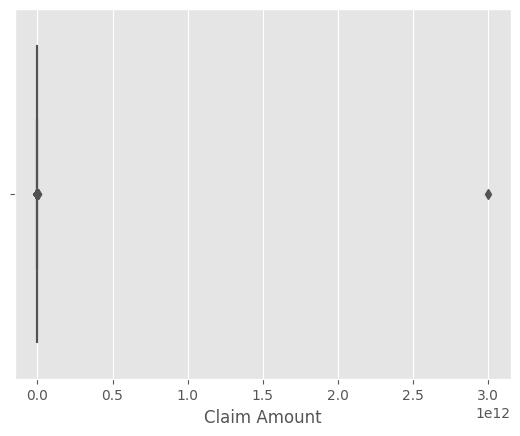

In [98]:
# box plot of claim amout
sns.boxplot(data=df, x='Claim Amount')

In [99]:
# descriptive stats of claim amount
df['Claim Amount'].describe()

count    1.784570e+05
mean     1.684762e+07
std      7.101582e+09
min      0.000000e+00
25%      2.500000e+01
50%      1.149500e+02
75%      3.500000e+02
max      3.000000e+12
Name: Claim Amount, dtype: float64

The box plot cannot clearly show the outliers in the data, however we can use the 75% percentile as a reference point. TSA claims with `Claim Amount` below $3500 will be selected.  

<AxesSubplot: xlabel='Close Amount'>

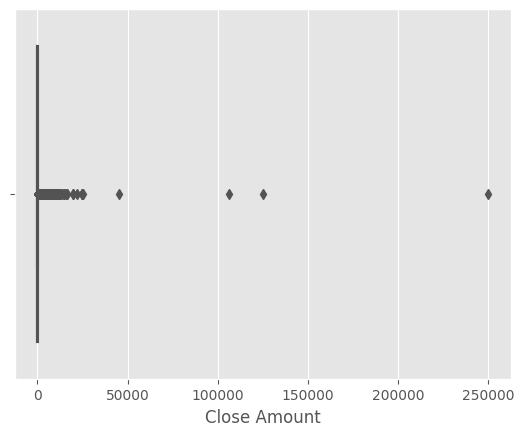

In [100]:
sns.boxplot(data=df, x='Close Amount')

Visually, we can estimate that the outliers in the `Close Amount` field fall above $1000. TSA claims below this figure are selected.

In [101]:
# df without outliers
df_outliersClean = df[(df['Claim Amount'] < 3500) & (df['Close Amount']< 1000.00)]
df_outliersClean

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full,2002
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Unspecified,Property Damage,Checkpoint,Computer,2270.09,Denied,0.00,Deny,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.00,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Denied,0.00,Deny,2002
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178450,2015052722774,2015-05-27,2015-04-29,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Motor Vehicle,Other,0.00,Denied,0.00,Deny,2015
178451,2015061123082,2015-06-02,2015-05-01,ZZX,Non TSA Airport (motor vehicle),Unspecified,Property Damage,Motor Vehicle,Other,777.12,Approved,777.12,Approve in Full,2015
178452,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Unspecified,Employee Loss (MPCECA),Motor Vehicle,Other,250.00,Approved,250.00,Approve in Full,2015
178453,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Unspecified,Motor Vehicle,Other,Other,656.56,Approved,656.56,Approve in Full,2015


<AxesSubplot: xlabel='Claim Amount', ylabel='Close Amount'>

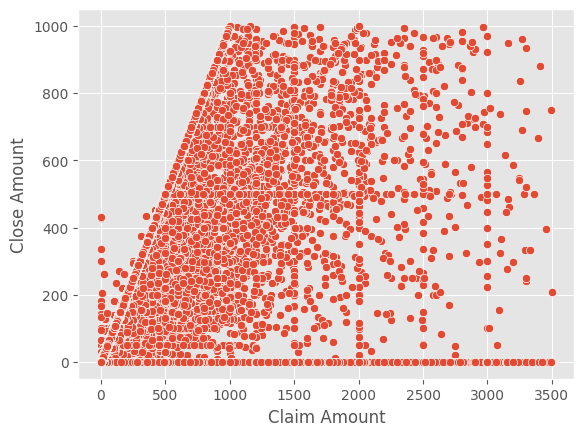

In [102]:
# scatter plot of df without outliers
sns.scatterplot(data=df_outliersClean, x='Claim Amount', y='Close Amount')

We will further investigate whether the `Claim Amount` and `Close Amount` are normally distributed to determine our correlation test method.

In [103]:
# Normality test with Kolmogorov Smirnov test

'''
*) If the P-Value is greater than 0.05, we assume a normal distribution
*) If the P-Value is less than 0.05, we do not assume a normal distribution
'''

from scipy.stats import kstest

print(kstest(df_outliersClean['Claim Amount'], 'norm'))
print(kstest(df_outliersClean['Close Amount'], 'norm'))

KstestResult(statistic=0.8350035739329924, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


The P-values (0.0) for the normality test is less than 0.05. So, we do not assume a normal distribution. Therefore, the Spearman correlation test method will be applied.

In [104]:
# generate correlation matrix
df_outliersClean[['Claim Amount', 'Close Amount']].corr(method='spearman')

,Claim Amount,Close Amount
Claim Amount,1.0000,0.1945
Close Amount,0.1945,1.0000


The correlation value (r=0.1945) shows that there is a weak relationship between Claim Amount and Amount. 

## Conclusion
Based on the addressed questions, the following conclusions are drawn;
* Since 2004, it was observed that there is a downward trend in the yearly number of reported TSA claims. This is a positive indicator of the TSA's performance in ensuring minimum injuries and damages during the screening process at US airports.
* 33.8% of the total claims were filed at 10 airports listed in the top 20 chart of US busiest airports. A positive linear relationship between high passenger traffic and frequency of TSA claims was seen in this case.
* The top 2 items being claimed are clothing and various types of luggage including footlockers. High-cost items such as jewelries, cameras and computers are also frequently claimed.
* Around 99% of TSA claims incident occurred in checked baggage and during screening at checkpoints. Airlines that received more TSA claims regarding issues with checked baggage include Delta Airlines, American Airlines, United Airlines and South-west Airlines.
* Items such as cameras, jewelry, computer, currency, cosmetics have a claim approval rate less than 30% while items such as eyeglasses, locks, clothing, and luggage (all types including footlockers) have a better chance of being approved by the TSA.


## Recommendations
Based on the analysis, the following recommendations are presented;
* The TSA operations management team could conduct an in-depth study to assess whether airports with high TSA claims need additional resources (man-power/equipment) for safer screening of people and goods.
* The TSA need to improve its safety measures concerning the handling of high-cost items such as jewelries, cameras and computers in order to reduce the operational cost of settling claims.
* The TSA can launch an advertisement campaign educating passengers on how to safely carry high-cost items such as jewelries, cameras and computers onboard airplanes.
* TSA can work closer with airlines to ensure that checked baggage are safely loaded and unloaded.
* The TSA can also collaborate with an aviation insurance company to transfer the risk of settling very expensive approved claims.
